# E-tivity 3: Linear classification
## MSc in AI - CE6002 & CS5062
Student Name: Michel Danjou

Student ID: 18263461

In [1]:
#%reset
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

# Task 3 (CE6002)
#### *Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.*
 
Interesting reads: 
  * https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
  * https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.9-The-Moore-Penrose-Pseudoinverse/


X.shape        :(1000, 2)
y.len          :1000
X_inverse      :[[ 2.45185396e-03  1.11069889e-03  7.24483975e-04 ...  9.93319622e-04
   1.90787801e-03 -1.14381161e-03]
 [ 4.99840465e-06 -2.07017877e-03  2.42544277e-03 ... -1.73098679e-03
   5.30935257e-04  1.99860149e-03]]
X_inverse.shape:(2, 1000)
w_lin          :[0.0041891  0.00067133]
w_lin_dot      :[0.0041891  0.00067133]
minx           : -1.0997558471880737
maxx           : 1.1206155709838115
vert.shape     : (1000, 2)


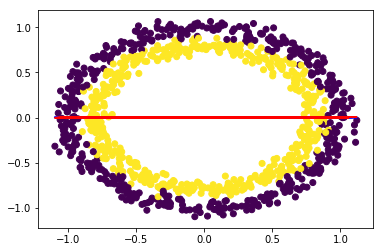

In [4]:
# Calculate pseudo-inverse
X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

minx = np.amin(X)
maxx = np.amax(X)
horz = np.linspace(minx, maxx, 1000)
vert = w_lin[0]*X + w_lin[1]

print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)
print("vert.shape     :", vert.shape)


plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(horz, vert, color='blue')

# Alternative approach for drawing the separating line.
yhat = X.dot(w_lin)
plt.plot(X, yhat, color='red')
#plt.plot(X, np.sign(yhat), color='red')
#plt.plot(X, y, color='red')
sign = np.sign(yhat)


#### *Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).*

The demarcation mark between the 2 sets of data is correct as it evenly splits both values representing each y values. However it is of no real value.



#### *Now choose suitable new features and use these in your linear regression algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!*

Interesting reads: 
  *   https://www.deeplearningbook.org/contents/ml.html (page 110, figure 5.16)

In [5]:
Xcopy = np.copy(X)

yhat           : -0.2041361276191792
X.shape        :(1000, 2)
y.len          :1000
X_inverse      :[[ 4.23604138e-03 -1.05389204e-04 -9.81210210e-04 ...  1.41150007e-05
   2.49770837e-03  1.38326412e-05]
 [-1.42398051e-03  2.73419162e-03  4.01655823e-03 ...  1.88250792e-03
  -6.66310368e-04  2.51123707e-03]]
X_inverse.shape:(2, 1000)
w_lin          :[-0.23309281 -0.26395477]
w_lin_dot      :[-0.23309281 -0.26395477]
minx           : 4.997264461680788e-07
maxx           : 1.2557792579313738
miny           : 0.7733749634847986
maxy           : -0.33557638371071286
vert.shape     : (1000, 2)


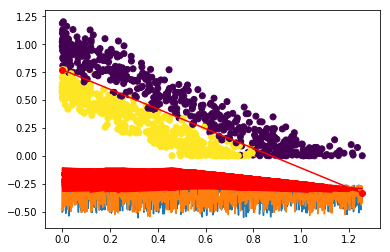

In [6]:
# Calculate pseudo-inverse
X = np.copy(Xcopy)
X = np.square(X)
X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

minx = np.amin(X)
maxx = np.amax(X)
horz = np.linspace(minx, maxx, 1000)
vert = w_lin[0]*X + w_lin[1]


plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(horz, vert)

yhat = X.dot(w_lin)
plt.plot(X, yhat, color='red')

print("yhat           :", yhat.mean() )

def decision_boundary_lin(weights, x_min, x_max, bias):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min, bias), point_on_boundary_lin(weights, x_max, bias)]

# HACK !!!!
def point_on_boundary_lin(weights, x, bias):
    # Return the y-position on the boundary based on given x-position
    return -(bias+weights[0]*x)/weights[1]

x_min = minx
x_max = maxx

# HACK !!!! 
# Was pocking around at various values to plot the line. 
# Looks like abs(yhat.mean()) allows us to plot a nice separating line.
# Can't find any rationale to support this. More than likely just a coincidence.
#
# This video might help: https://www.google.com/search?q=how+to+perform+simple+linear+regression+by+hand&rlz=1C1GCEA_enGB817GB817&oq=how+to+perform+simple+linear+regression+by+h&aqs=chrome.0.0j69i57j0.8679j0j7&sourceid=chrome&ie=UTF-8&safe=active&ssui=on#kpvalbx=1

bias = abs(yhat.mean())

miny, maxy = decision_boundary_lin(w_lin, minx, maxx, bias)
plt.plot([minx, maxx], [miny, maxy], 'ro-')

print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)
print("miny           :", miny)
print("maxy           :", maxy)
print("vert.shape     :", vert.shape)


## Attempt 2 - Adding bias to X square array

X: [[1.00000000e+00 1.03258099e+00 7.13285101e-07]
 [1.00000000e+00 2.14146112e-01 7.13459715e-01]
 [1.00000000e+00 8.84533482e-02 9.74639871e-01]
 ...
 [1.00000000e+00 1.71158534e-01 4.98924248e-01]
 [1.00000000e+00 6.24245777e-01 4.58189165e-02]
 [1.00000000e+00 2.26955662e-01 6.65113358e-01]]
X.shape        :(1000, 3)
y.len          :1000
X_inverse      :[[-0.00311691 -0.00124654 -0.00407798 ...  0.00403567  0.00419605
  -0.000511  ]
 [ 0.00778439  0.00131369  0.00366123 ... -0.00458017 -0.00227916
   0.00059557]
 [ 0.00218635  0.00417806  0.0087401  ... -0.00279203 -0.00552662
   0.00310313]]
X_inverse.shape:(3, 1000)
w_lin          :[ 3.62529393 -4.36019347 -4.46314764]
w_lin_dot      :[ 3.62529393 -4.36019347 -4.46314764]
minx           : 4.997264461680788e-07
maxx           : 1.2557792579313738
miny           : 0.8122724230577253
maxy           : -0.4145385128453493


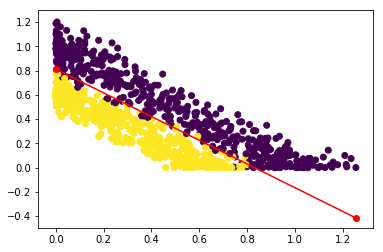

In [7]:
# Calculate pseudo-inverse
X = np.copy(Xcopy)
Xsq = np.square(X)

#
# GOTCHA.
# Kudos to Gerry Carty for pointing this out.
#
# According to Professor Yaser S. Abu-Mostafa, we need to "Construct the matrix X and the vector y 
# from the data set (x1,y1),...,(xn,yn), where each x includes the x0=1 bias coordinate."
#
# Not sure if I understand the last part of the sentence ("where each x includes the x0=1 bias") but 
# if I insert a column of ones I get able to get all the weights I need to draw the demarcation line.
# 

X = np.insert(Xsq, 0, 1, axis=1)
print("X:", X)

X_inverse = np.linalg.pinv(X)
w_lin = np.matmul(X_inverse, y)
w_lin_dot = X_inverse.dot(y)

minx = np.amin(Xsq)
maxx = np.amax(Xsq)

plt.scatter(X[:,1], X[:,2], c=y)
yhat = X.dot(w_lin)

def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

x_min = minx
x_max = maxx

miny, maxy = decision_boundary_lin(w_lin, minx, maxx)
plt.plot([minx, maxx], [miny, maxy], 'ro-')

print("X.shape        :{}".format(X.shape))
print("y.len          :{}".format(len(y)))
print("X_inverse      :{}".format(X_inverse ))
print("X_inverse.shape:{}".format(X_inverse.shape ))
print("w_lin          :{}".format(w_lin))
print("w_lin_dot      :{}".format(w_lin_dot))
print("minx           :", minx)
print("maxx           :", maxx)
print("miny           :", miny)
print("maxy           :", maxy)


## Attempt 3 - Using PLA. !!!! REMOVE !!!

In [8]:
def pocket(training_in, training_out, weights, max_iterations):
    bias = np.array([1])
    iterations=0

    # initialise the pocket algorithm variables
    best_weights = weights
    best_weights_iteration = 0
    best_e = calc_error(training_in, training_out, weights)
    
    while iterations < max_iterations:
        errors = 0;
        iterations+=1;
        print("Iteration:{}/{}".format(iterations, max_iterations))
        
        for x,y in zip(training_in, training_out):           
            if (h(x,weights)!=y):
                
                # pocket best results
                e = calc_error(training_in, training_out, weights)
                if (e < best_e):
                    best_e = e
                    best_weights = weights
                    best_weights_iteration = iterations
                    print("Pocketing weights:{} e:{} found at iterations:{}".format(best_weights, best_e, best_weights_iteration))
                
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;                
            
        if (errors == 0):
            print("Hypothesis found. Nb iterations:", iterations)
            break
            
    return best_weights, best_weights_iteration, best_e, iterations 


def generate_weights():
    weights = np.array([np.random.uniform(-1,1) for i in range(3)])
    print("Random weights:", weights)
    return weights


def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)


def h(x,w):

    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))


def decision_boundary(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]


def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]


# Number of iterations before exiting the PLA.
max_iterations = 10
weights = generate_weights()
X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)

best_weights, best_weights_iteration, best_e, total_iterations = \
pocket(X_train, y_train, weights, max_iterations)

x_min = min(X[:,0])
x_max = max(X[:,0])
y_min, y_max = decision_boundary(best_weights, x_min, x_max)
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(horz, vert)
plt.plot([x_min, x_max], [y_min, y_max], 'ro-')
plt.show()

Random weights: [-0.57393588 -0.65044309  0.48457643]


ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

#### *Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.*